<h1><div align="center">Deep Learning From Scratch</div></h1>
<h2><div align="center">Logistic Regression</div></h2>
<div align="center">Bruno Gonçalves</div>
<div align="center"><a href="http://www.data4sci.com/">www.data4sci.com</a></div>
<div align="center">@bgoncalves</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import watermark

%load_ext watermark
%matplotlib inline

In [2]:
%watermark -n -v -m -p numpy,matplotlib,pandas,seaborn

Fri Apr 19 2019 

CPython 3.7.3
IPython 7.4.0

numpy 1.16.2
matplotlib 3.0.3
pandas 0.24.2
seaborn 0.9.0

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 18.2.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit


# Load the dataset

In [3]:
data = pd.read_csv('data/iris.csv', delimiter=',', header=0)

Quick visualization of the data. Always a good way to make sure we have what we expect

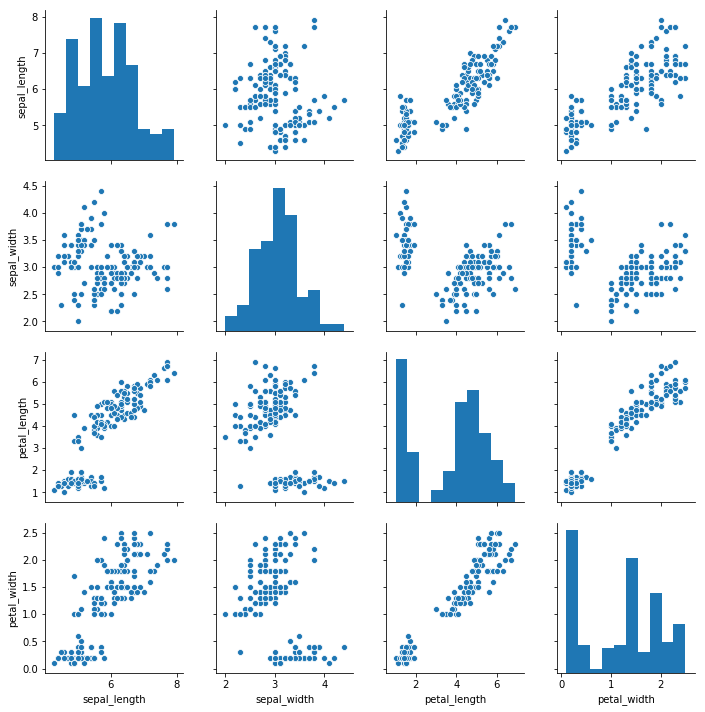

In [4]:
sns.pairplot(data)

Set the labels. We will try to predict the 'virginica' label

In [5]:
data['y'] = 0
data.loc[data['species'] == 'virginica', 'y'] = 1

Extract the data as arrays

In [6]:
X = data[['sepal_length','sepal_width','petal_length','petal_width']].values
y = data['y'].values.reshape(-1,1)

## Utility functions

Logistic function

In [7]:
def logistic(z):
    return 1./(1+np.exp(-z))

Get matrix dimensions and add the bias column

In [8]:
M, N = X.shape
X = np.concatenate((np.ones((M, 1)), X), axis=1)

Now we have a few more features

In [9]:
print(X)

[[1.  5.1 3.5 1.4 0.2]
 [1.  4.9 3.  1.4 0.2]
 [1.  4.7 3.2 1.3 0.2]
 [1.  4.6 3.1 1.5 0.2]
 [1.  5.  3.6 1.4 0.2]
 [1.  5.4 3.9 1.7 0.4]
 [1.  4.6 3.4 1.4 0.3]
 [1.  5.  3.4 1.5 0.2]
 [1.  4.4 2.9 1.4 0.2]
 [1.  4.9 3.1 1.5 0.1]
 [1.  5.4 3.7 1.5 0.2]
 [1.  4.8 3.4 1.6 0.2]
 [1.  4.8 3.  1.4 0.1]
 [1.  4.3 3.  1.1 0.1]
 [1.  5.8 4.  1.2 0.2]
 [1.  5.7 4.4 1.5 0.4]
 [1.  5.4 3.9 1.3 0.4]
 [1.  5.1 3.5 1.4 0.3]
 [1.  5.7 3.8 1.7 0.3]
 [1.  5.1 3.8 1.5 0.3]
 [1.  5.4 3.4 1.7 0.2]
 [1.  5.1 3.7 1.5 0.4]
 [1.  4.6 3.6 1.  0.2]
 [1.  5.1 3.3 1.7 0.5]
 [1.  4.8 3.4 1.9 0.2]
 [1.  5.  3.  1.6 0.2]
 [1.  5.  3.4 1.6 0.4]
 [1.  5.2 3.5 1.5 0.2]
 [1.  5.2 3.4 1.4 0.2]
 [1.  4.7 3.2 1.6 0.2]
 [1.  4.8 3.1 1.6 0.2]
 [1.  5.4 3.4 1.5 0.4]
 [1.  5.2 4.1 1.5 0.1]
 [1.  5.5 4.2 1.4 0.2]
 [1.  4.9 3.1 1.5 0.1]
 [1.  5.  3.2 1.2 0.2]
 [1.  5.5 3.5 1.3 0.2]
 [1.  4.9 3.1 1.5 0.1]
 [1.  4.4 3.  1.3 0.2]
 [1.  5.1 3.4 1.5 0.2]
 [1.  5.  3.5 1.3 0.3]
 [1.  4.5 2.3 1.3 0.3]
 [1.  4.4 3.2 1.3 0.2]
 [1.  5.  3

Set the training parameters and initialize the weight matrix

In [10]:
alpha = 0.5
epsilon = 0.12

weights = 2*np.random.rand(N+1, 1)*epsilon - epsilon

# Training procedure

In [11]:
oldJ = 0
err = 1

Js = []
count = 0

while err > 1e-3:
    Zs = np.dot(X, weights)
    Hs = logistic(Zs)
    deltas = alpha/M*np.dot(X.T, (Hs-y))

    count += 1
    weights -= deltas

    J = -1/M*np.dot(y.T, np.log(Hs)) - np.dot(1-y.T, np.log(1-Hs))
    Js.append(float(J))
    err = np.abs(oldJ-J)
    oldJ = J
    
    if count % 10 == 0:
        print(count, J, err, weights.flatten())

print(count, J, err, weights.flatten())

10 [[3.35120899]] [[517.1600948]] [-0.2170327  -0.41985794 -0.79953319  1.48499607  0.87334187]
20 [[1.61896712]] [[315.62398834]] [-0.32883798 -0.42142626 -1.01042269  2.41922386  1.4376909 ]
30 [[1.55029066]] [[317.33109471]] [-0.48177821 -0.76409461 -1.30727273  2.91290637  1.82823693]
40 [[1.35195862]] [[284.95764707]] [-0.6157194  -1.07370534 -1.52698184  3.27836703  2.15425535]
50 [[1.20242967]] [[258.33354612]] [-0.74423827 -1.36726498 -1.72966379  3.6258429   2.46882268]
60 [[1.10117738]] [[232.09139523]] [-0.8701869  -1.65481649 -1.92682114  3.96154847  2.77567905]
70 [[1.02917719]] [[205.32601764]] [-0.99326106 -1.93653587 -2.11930477  4.28264666  3.07308496]
80 [[0.97200129]] [[177.63264069]] [-1.11229795 -2.21037765 -2.3056716   4.58227354  3.35666111]
90 [[0.92466478]] [[148.03937101]] [-1.22582836 -2.47448354 -2.4840977   4.8484629   3.61872243]
100 [[0.91204119]] [[113.03444191]] [-1.33235948 -2.732214   -2.65439319  5.05409624  3.8429122 ]
110 [[1.39696771]] [[58.362103

## Solution exploration

In [12]:
def plot_boundary(Zs, Hs, y):
    data_fit = np.concatenate((Zs, Hs), axis=1)
    data_fit.sort(axis = 0)

    z = np.linspace(Zs.min(), Zs.max(), 100)

    plt.plot(z, logistic(z), 'r-', label='Theory')
    plt.plot(Zs, Hs, 'X', label='empirical')
    plt.plot(Zs, y, '*', label = 'data')
    plt.xlabel('z')
    plt.ylabel('h(z)')
    plt.title('Logistic Regression')
    plt.gcf().set_size_inches(11, 8)
    plt.legend()

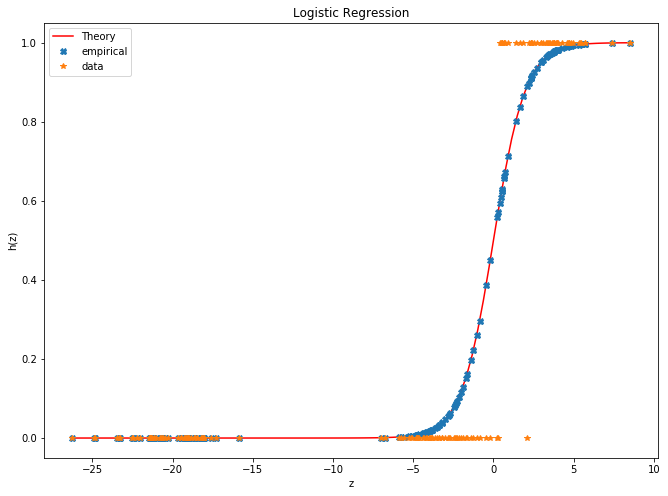

In [13]:
plot_boundary(Zs, Hs, y)

Utility function to plot labeled points

In [14]:
def plot_points(data, features, weights, label='y'):
    plt.plot(data[features[0]][data[label]==0], data[features[1]][data[label]==0], '*', label='y=0')
    plt.plot(data[features[0]][data[label]==1], data[features[1]][data[label]==1], '+', label='y=1')

    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.gcf().set_size_inches(11, 8)
    plt.legend()

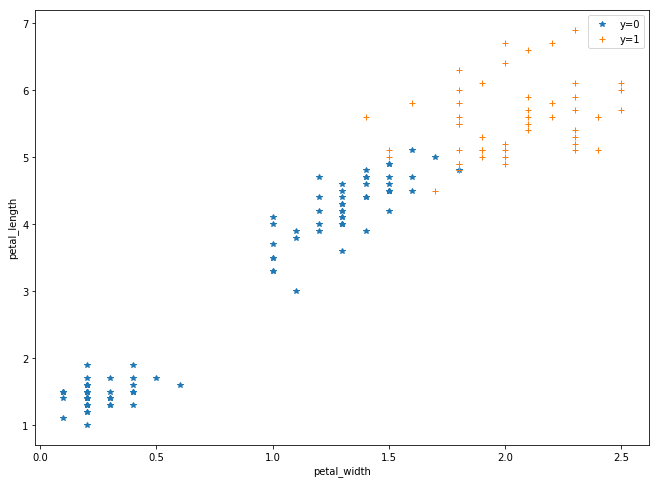

In [15]:
plot_points(data, ['petal_width', 'petal_length'], weights)

The separation bounday is not perfect here either

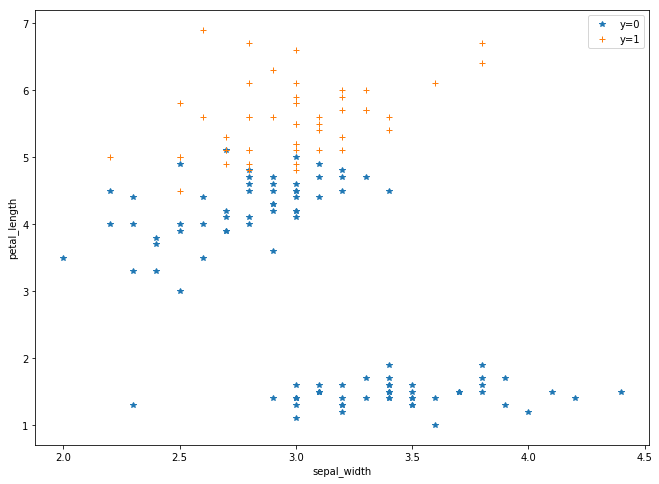

In [16]:
plot_points(data, ['sepal_width', 'petal_length'], weights)